In [1]:
import requests
import pandas as pd
import logging
import json
import io
import gdown
import seaborn as sns
import matplotlib.pyplot as plt
from configparser import ConfigParser

# EDA

In [2]:
#!wget https://raw.githubusercontent.com/vordex-dd/SMADIMO-GP-2/refs/heads/main/parsed_data/stepik_courses.json
!wget https://raw.githubusercontent.com/vordex-dd/SMADIMO-GP-2/refs/heads/main/parsed_data/data_full.csv
!wget https://raw.githubusercontent.com/vordex-dd/SMADIMO-GP-2/refs/heads/main/parsed_data/stepik_idx2tags.json
!wget https://raw.githubusercontent.com/vordex-dd/SMADIMO-GP-2/refs/heads/main/parsed_data/stepik_tags2idx.json

--2025-03-04 15:06:49--  https://raw.githubusercontent.com/vordex-dd/SMADIMO-GP-2/refs/heads/main/parsed_data/data_full.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51730414 (49M) [text/plain]
Saving to: ‘data_full.csv’

data_full.csv       100%[===================>]  49.33M  83.0MB/s    in 0.6s    

2025-03-04 15:06:51 (83.0 MB/s) - ‘data_full.csv’ saved [51730414/51730414]

--2025-03-04 15:06:51--  https://raw.githubusercontent.com/vordex-dd/SMADIMO-GP-2/refs/heads/main/parsed_data/stepik_idx2tags.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaitin

In [3]:
df_full = pd.read_csv('data_full.csv')
df_full.head(5)

<ipython-input-3-a672930e285a>:1: DtypeWarning: Columns (1,10,11,21,37,38,39,40,41,47,48,49,62,63,64,76,80,89,95,105,106,120,134,136,137) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv('data_full.csv')


,Unnamed: 0,id,summary,workload,cover,intro,course_format,target_audience,certificate_footer,certificate_cover_org,...,admins_group,discussions_count,discussion_proxy,discussion_threads,lti_consumer_key,lti_secret_key,lti_private_profile,source,partnerIds,tags_text
0,0,233488,Данный курс является учебным заданием в рамках...,NaN,https://cdn.stepik.net/media/cache/images/cour...,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,[],NaN,NaN,False,stepik,NaN,NaN
1,1,233486,Данный курс раскроет перед Вами теорию указате...,NaN,https://cdn.stepik.net/media/cache/images/cour...,NaN,NaN,"Курс для новичков в программировании, но кто у...",NaN,NaN,...,NaN,0.0,NaN,[],NaN,NaN,False,stepik,NaN,NaN
2,2,233485,Основной идеей программы является создание усл...,4 ч в неделю,https://cdn.stepik.net/media/cache/images/cour...,NaN,NaN,Программа рекомендована для учащихся в возраст...,NaN,NaN,...,NaN,0.0,NaN,[],NaN,NaN,False,stepik,NaN,NaN
3,3,233480,Этот курс предоставляет глубокий анализ полити...,1 час в неделю,https://cdn.stepik.net/media/cache/images/cour...,NaN,NaN,"Целевая аудитория курса ""История политического...",NaN,NaN,...,NaN,0.0,NaN,[],NaN,NaN,False,stepik,NaN,NaN
4,4,233479,"Курс ""Основы информационной безопасности"" пред...",NaN,https://cdn.stepik.net/media/cache/images/cour...,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,[],NaN,NaN,False,stepik,NaN,NaN


In [4]:
df_full.shape

(12205, 138)

## Очистка данных

In [5]:
df_full.isna().sum()

,0
Unnamed: 0,0
id,161
summary,201
workload,5836
cover,2161
...,...
lti_secret_key,12205
lti_private_profile,2161
source,0
partnerIds,10205


In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
(df_full.isna().sum() / df_full.shape[0]).apply(lambda x: '{:.2%}'.format(x))

,0
Unnamed: 0,0.00%
id,1.32%
summary,1.65%
workload,47.82%
cover,17.71%
intro,100.00%
course_format,100.00%
target_audience,42.68%
certificate_footer,100.00%
certificate_cover_org,91.41%


In [7]:
df = df_full[df_full['source'] == 'stepik']
df.loc[:, 'tags'] = df['tags'].apply(lambda x: list(map(int, x[1: -1].split(', '))) if len(x) > 2 else [])

In [9]:
df[df.isna().sum()[df.isna().sum() < 100].index]
df.head()

,Unnamed: 0,id,summary,workload,cover,intro,course_format,target_audience,certificate_footer,certificate_cover_org,is_certificate_issued,is_certificate_auto_issued,certificate_regular_threshold,certificate_distinction_threshold,instructors,certificate,requirements,description,sections,total_units,enrollment,is_favorite,actions,progress,first_lesson,first_unit,certificate_link,certificate_regular_link,certificate_distinction_link,user_certificate,referral_link,schedule_link,schedule_long_link,first_deadline,last_deadline,subscriptions,announcements,is_contest,is_self_paced,is_adaptive,is_idea_compatible,is_in_wishlist,last_step,intro_video,social_providers,authors,tags,has_tutors,is_enabled,is_proctored,proctor_url,review_summary,schedule_type,certificates_count,learners_count,lessons_count,quizzes_count,challenges_count,peer_reviews_count,instructor_reviews_count,videos_duration,time_to_complete,is_popular,is_processed_with_paddle,is_unsuitable,is_paid,price,currency_code,display_price,default_promo_code_name,default_promo_code_price,default_promo_code_discount,default_promo_code_is_percent_discount,default_promo_code_expire_date,continue_url,readiness,is_archived,options,price_tier,position,is_censored,difficulty,acquired_skills,acquired_assets,learning_format,content_details,issue,course_type,possible_type,is_certificate_with_score,preview_lesson,preview_unit,possible_currencies,commission_basic,commission_promo,with_certificate,child_courses,child_courses_count,parent_courses,became_published_at,became_paid_at,title_en,last_update_price_date,owner,language,is_featured,is_public,canonical_url,title,slug,begin_date,end_date,soft_deadline,hard_deadline,grading_policy,begin_date_source,end_date_source,soft_deadline_source,hard_deadline_source,grading_policy_source,is_active,create_date,update_date,learners_group,testers_group,moderators_group,assistants_group,teachers_group,admins_group,discussions_count,discussion_proxy,discussion_threads,lti_consumer_key,lti_secret_key,lti_private_profile,source,partnerIds,tags_text
0,0,233488,Данный курс является учебным заданием в рамках...,NaN,https://cdn.stepik.net/media/cache/images/cour...,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,[1007190284],NaN,NaN,NaN,"[509915, 509916, 509928]",6.0,NaN,False,"{'view_reports': {'enabled': False, 'needs_per...",NaN,1648048.0,1670766.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['31-78-233488', '30-78-233488']",[],False,True,False,False,False,78-233488,NaN,[],[1007190284],"[235, 241]",False,True,False,NaN,232855.0,self_paced,0.0,0.0,6.0,6.0,0.0,0.0,0.0,0.0,NaN,False,False,False,False,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,/course/233488/continue,0.727273,False,{},NaN,22.0,False,easy,"['Из чего состоят китайские иероглифы: ключи, ...",[],NaN,[],NaN,basic,NaN,False,NaN,NaN,[],NaN,NaN,False,[],0.0,[],2025-02-25 08:34:54.576000+00:00,NaN,Secrets of Chinese Characters: from drawings t...,NaN,1.007190e+09,ru,False,True,https://stepik.org/course/233488/,Тайны китайских иероглифов: от рисунков к симв...,Тайны-китайских-иероглифов-от-рисунков-к-симво...,NaN,NaN,NaN,NaN,no_deadlines,NaN,NaN,NaN,NaN,no_deadlines,True,2025-02-25T04:58:57Z,2025-02-25T08:37:02Z,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,[],NaN,NaN,False,stepik,NaN,NaN
1,1,233486,Данный курс раскроет перед Вами теорию указате...,NaN,https://cdn.stepik.net/media/cache/images/cour...,NaN,NaN,"Курс для новичков в программировании, но кто у...",NaN,NaN,False,False,NaN,NaN,[632659935],NaN,<p>Знать небольшие основы C++ или другого язык...,<p>Цель курса познакомить ученика с указателям...,"[509906, 509907, 509908]",6.0,NaN,False,"{'view_reports': {'enabled': False, 'needs_per...",NaN,1648007.0,1670733.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['31-78-233486', '30-78-233486']",[],False,True,False,False,False,78-233486,NaN,[],[632659935],"[1, 2, 5, 52]",False,True,False,NaN,232853.0,self_paced,0.0,0.0,6.0,0.0,19.0,0.0,0.0,10579.0,NaN,False,False,False,True,3900.0,RUB,3900 ₽,NaN,NaN,NaN,NaN,NaN,/course/233486/continue,0.818182,False,{},NaN,

In [10]:
useful_columns = [
    'id',
    'title',
    'summary',
    'workload',
    'target_audience',
    'is_certificate_issued',
    'is_certificate_auto_issued',
    'requirements',
    'description',
    'sections',
    'total_units',
    'is_self_paced',
    'authors',
    'certificates_count',
    'learners_count',
    'lessons_count',
    'quizzes_count',
    'challenges_count',
    'videos_duration',
    'is_popular',
    'is_paid',
    'display_price',
    'readiness',
    'course_type',
    'with_certificate',
    'language',
    'create_date',
    'update_date',
    'tags'
]

In [11]:
df.columns

Index(['Unnamed: 0', 'id', 'summary', 'workload', 'cover', 'intro',
       'course_format', 'target_audience', 'certificate_footer',
       'certificate_cover_org',
       ...
       'admins_group', 'discussions_count', 'discussion_proxy',
       'discussion_threads', 'lti_consumer_key', 'lti_secret_key',
       'lti_private_profile', 'source', 'partnerIds', 'tags_text'],
      dtype='object', length=138)

In [12]:
with pd.option_context('display.max_rows', None,):
    print(df.iloc[0])

Unnamed: 0                                                                                0
id                                                                                   233488
summary                                   Данный курс является учебным заданием в рамках...
workload                                                                                NaN
cover                                     https://cdn.stepik.net/media/cache/images/cour...
intro                                                                                   NaN
course_format                                                                           NaN
target_audience                                                                         NaN
certificate_footer                                                                      NaN
certificate_cover_org                                                                   NaN
is_certificate_issued                                                           

In [13]:
df = df[useful_columns]
df.head()

,id,title,summary,workload,target_audience,is_certificate_issued,is_certificate_auto_issued,requirements,description,sections,total_units,is_self_paced,authors,certificates_count,learners_count,lessons_count,quizzes_count,challenges_count,videos_duration,is_popular,is_paid,display_price,readiness,course_type,with_certificate,language,create_date,update_date,tags
0,233488,Тайны китайских иероглифов: от рисунков к симв...,Данный курс является учебным заданием в рамках...,NaN,NaN,False,False,NaN,NaN,"[509915, 509916, 509928]",6.0,True,[1007190284],0.0,0.0,6.0,6.0,0.0,0.0,False,False,-,0.727273,basic,False,ru,2025-02-25T04:58:57Z,2025-02-25T08:37:02Z,"[235, 241]"
1,233486,C++ Практикум по массивам,Данный курс раскроет перед Вами теорию указате...,NaN,"Курс для новичков в программировании, но кто у...",False,False,<p>Знать небольшие основы C++ или другого язык...,<p>Цель курса познакомить ученика с указателям...,"[509906, 509907, 509908]",6.0,True,[632659935],0.0,0.0,6.0,0.0,19.0,10579.0,False,True,3900 ₽,0.818182,basic_paid,False,ru,2025-02-25T03:49:18Z,2025-02-25T10:13:31Z,"[1, 2, 5, 52]"
2,233485,Школа лидера,Основной идеей программы является создание усл...,4 ч в неделю,Программа рекомендована для учащихся в возраст...,False,False,"<p>Главное, иметь желание развиваться.</p>",<p><strong>Цели и задачи:</strong></p>\n\n<p>-...,"[509903, 509904, 509905]",10.0,True,[324052716],0.0,0.0,10.0,0.0,0.0,0.0,False,False,-,0.818182,basic,False,ru,2025-02-25T02:49:38Z,2025-02-25T07:38:09Z,"[248, 273, 324, 326, 348]"
3,233480,История политического устройства России,Этот курс предоставляет глубокий анализ полити...,1 час в неделю,"Целевая аудитория курса ""История политического...",False,False,<p>Никаких.</p>,"<p><strong>Для кого будет полезен курс ""Истори...","[509889, 509890, 509891, 509892, 509893]",17.0,True,[1007069807],0.0,0.0,17.0,16.0,0.0,0.0,False,False,-,1.000000,basic,False,ru,2025-02-24T23:24:49Z,2025-02-25T01:18:18Z,"[114, 139, 140, 141, 297, 302, 303, 304, 381, ..."
4,233479,Основы информационной безопасности,"Курс ""Основы информационной безопасности"" пред...",NaN,NaN,False,False,NaN,"<p>Курс <strong>""Основы информационной безопас...","[509877, 509878, 509883, 509884, 509885]",17.0,True,[1028553197],0.0,0.0,17.0,12.0,0.0,0.0,False,False,-,0.909091,basic,False,ru,2025-02-24T21:32:02Z,2025-02-24T23:17:38Z,"[1, 100, 114, 365, 370, 386, 54, 324, 327]"


In [14]:
df.iloc[2]

,2
id,233485
title,Школа лидера
summary,Основной идеей программы является создание усл...
workload,4 ч в неделю
target_audience,Программа рекомендована для учащихся в возраст...
is_certificate_issued,False
is_certificate_auto_issued,False
requirements,"<p>Главное, иметь желание развиваться.</p>"
description,<p><strong>Цели и задачи:</strong></p>\n\n<p>-...
sections,"[509903, 509904, 509905]"


Надо проверить колонку with_certificate и is_certificate_issued, так как есть ощущение, что они одинаковые.

In [15]:
df[df['is_certificate_issued'] != df['with_certificate']][['is_certificate_issued', 'with_certificate']]

,is_certificate_issued,with_certificate
9,False,True
10,False,True
20,False,True
23,False,True
44,False,True
49,False,True
55,False,True
64,False,True
71,False,True
73,False,True


    Скорее всего признак is_certificate_issued относится к выпуску сертификата для пользователя api, а with_certificate отвечает за наличие
    сертификата у курса. Предлагается оставить with_certificate, is_certificate_issued дропнуть.

In [16]:
df.drop(['is_certificate_issued', 'is_certificate_auto_issued'], inplace=True, axis=1)
df.head()

<ipython-input-16-802611d423c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['is_certificate_issued', 'is_certificate_auto_issued'], inplace=True, axis=1)


,id,title,summary,workload,target_audience,requirements,description,sections,total_units,is_self_paced,authors,certificates_count,learners_count,lessons_count,quizzes_count,challenges_count,videos_duration,is_popular,is_paid,display_price,readiness,course_type,with_certificate,language,create_date,update_date,tags
0,233488,Тайны китайских иероглифов: от рисунков к симв...,Данный курс является учебным заданием в рамках...,NaN,NaN,NaN,NaN,"[509915, 509916, 509928]",6.0,True,[1007190284],0.0,0.0,6.0,6.0,0.0,0.0,False,False,-,0.727273,basic,False,ru,2025-02-25T04:58:57Z,2025-02-25T08:37:02Z,"[235, 241]"
1,233486,C++ Практикум по массивам,Данный курс раскроет перед Вами теорию указате...,NaN,"Курс для новичков в программировании, но кто у...",<p>Знать небольшие основы C++ или другого язык...,<p>Цель курса познакомить ученика с указателям...,"[509906, 509907, 509908]",6.0,True,[632659935],0.0,0.0,6.0,0.0,19.0,10579.0,False,True,3900 ₽,0.818182,basic_paid,False,ru,2025-02-25T03:49:18Z,2025-02-25T10:13:31Z,"[1, 2, 5, 52]"
2,233485,Школа лидера,Основной идеей программы является создание усл...,4 ч в неделю,Программа рекомендована для учащихся в возраст...,"<p>Главное, иметь желание развиваться.</p>",<p><strong>Цели и задачи:</strong></p>\n\n<p>-...,"[509903, 509904, 509905]",10.0,True,[324052716],0.0,0.0,10.0,0.0,0.0,0.0,False,False,-,0.818182,basic,False,ru,2025-02-25T02:49:38Z,2025-02-25T07:38:09Z,"[248, 273, 324, 326, 348]"
3,233480,История политического устройства России,Этот курс предоставляет глубокий анализ полити...,1 час в неделю,"Целевая аудитория курса ""История политического...",<p>Никаких.</p>,"<p><strong>Для кого будет полезен курс ""Истори...","[509889, 509890, 509891, 509892, 509893]",17.0,True,[1007069807],0.0,0.0,17.0,16.0,0.0,0.0,False,False,-,1.000000,basic,False,ru,2025-02-24T23:24:49Z,2025-02-25T01:18:18Z,"[114, 139, 140, 141, 297, 302, 303, 304, 381, ..."
4,233479,Основы информационной безопасности,"Курс ""Основы информационной безопасности"" пред...",NaN,NaN,NaN,"<p>Курс <strong>""Основы информационной безопас...","[509877, 509878, 509883, 509884, 509885]",17.0,True,[1028553197],0.0,0.0,17.0,12.0,0.0,0.0,False,False,-,0.909091,basic,False,ru,2025-02-24T21:32:02Z,2025-02-24T23:17:38Z,"[1, 100, 114, 365, 370, 386, 54, 324, 327]"


In [17]:
pd.set_option('display.max_columns', None)

In [18]:
with pd.option_context('display.max_rows', None,):
    df.head()

Заменим массив sections на его длину, чтобы иметь информацию о количестве секций. Тоже самое с автроами.

In [19]:
df.loc[:, 'sections'] = df['sections'].apply(lambda x: x[1:-1].split(', ')) # !!!исправить
df.loc[:, 'authors'] = df['authors'].apply(lambda x: x[1:-1].split(', '))

In [20]:
df.loc[:, 'sections'] = df['sections'].apply(len)
df.loc[:, 'authors'] = df['authors'].apply(len)
df.head()

,id,title,summary,workload,target_audience,requirements,description,sections,total_units,is_self_paced,authors,certificates_count,learners_count,lessons_count,quizzes_count,challenges_count,videos_duration,is_popular,is_paid,display_price,readiness,course_type,with_certificate,language,create_date,update_date,tags
0,233488,Тайны китайских иероглифов: от рисунков к симв...,Данный курс является учебным заданием в рамках...,NaN,NaN,NaN,NaN,3,6.0,True,1,0.0,0.0,6.0,6.0,0.0,0.0,False,False,-,0.727273,basic,False,ru,2025-02-25T04:58:57Z,2025-02-25T08:37:02Z,"[235, 241]"
1,233486,C++ Практикум по массивам,Данный курс раскроет перед Вами теорию указате...,NaN,"Курс для новичков в программировании, но кто у...",<p>Знать небольшие основы C++ или другого язык...,<p>Цель курса познакомить ученика с указателям...,3,6.0,True,1,0.0,0.0,6.0,0.0,19.0,10579.0,False,True,3900 ₽,0.818182,basic_paid,False,ru,2025-02-25T03:49:18Z,2025-02-25T10:13:31Z,"[1, 2, 5, 52]"
2,233485,Школа лидера,Основной идеей программы является создание усл...,4 ч в неделю,Программа рекомендована для учащихся в возраст...,"<p>Главное, иметь желание развиваться.</p>",<p><strong>Цели и задачи:</strong></p>\n\n<p>-...,3,10.0,True,1,0.0,0.0,10.0,0.0,0.0,0.0,False,False,-,0.818182,basic,False,ru,2025-02-25T02:49:38Z,2025-02-25T07:38:09Z,"[248, 273, 324, 326, 348]"
3,233480,История политического устройства России,Этот курс предоставляет глубокий анализ полити...,1 час в неделю,"Целевая аудитория курса ""История политического...",<p>Никаких.</p>,"<p><strong>Для кого будет полезен курс ""Истори...",5,17.0,True,1,0.0,0.0,17.0,16.0,0.0,0.0,False,False,-,1.000000,basic,False,ru,2025-02-24T23:24:49Z,2025-02-25T01:18:18Z,"[114, 139, 140, 141, 297, 302, 303, 304, 381, ..."
4,233479,Основы информационной безопасности,"Курс ""Основы информационной безопасности"" пред...",NaN,NaN,NaN,"<p>Курс <strong>""Основы информационной безопас...",5,17.0,True,1,0.0,0.0,17.0,12.0,0.0,0.0,False,False,-,0.909091,basic,False,ru,2025-02-24T21:32:02Z,2025-02-24T23:17:38Z,"[1, 100, 114, 365, 370, 386, 54, 324, 327]"


In [21]:
df.loc[:, 'create_date'] = pd.to_datetime(df['create_date'])
df.loc[:, 'update_date'] = pd.to_datetime(df['update_date'])

Приведем цену за курс к общиму числовому формату

In [22]:
def to_price(s):
    if s == '-':
        return 0
    else:
        return int(s[:-2])


df.loc[:, 'display_price'] = df['display_price'].apply(to_price).astype('int64')
df.head()

,id,title,summary,workload,target_audience,requirements,description,sections,total_units,is_self_paced,authors,certificates_count,learners_count,lessons_count,quizzes_count,challenges_count,videos_duration,is_popular,is_paid,display_price,readiness,course_type,with_certificate,language,create_date,update_date,tags
0,233488,Тайны китайских иероглифов: от рисунков к симв...,Данный курс является учебным заданием в рамках...,NaN,NaN,NaN,NaN,3,6.0,True,1,0.0,0.0,6.0,6.0,0.0,0.0,False,False,0,0.727273,basic,False,ru,2025-02-25 04:58:57+00:00,2025-02-25 08:37:02+00:00,"[235, 241]"
1,233486,C++ Практикум по массивам,Данный курс раскроет перед Вами теорию указате...,NaN,"Курс для новичков в программировании, но кто у...",<p>Знать небольшие основы C++ или другого язык...,<p>Цель курса познакомить ученика с указателям...,3,6.0,True,1,0.0,0.0,6.0,0.0,19.0,10579.0,False,True,3900,0.818182,basic_paid,False,ru,2025-02-25 03:49:18+00:00,2025-02-25 10:13:31+00:00,"[1, 2, 5, 52]"
2,233485,Школа лидера,Основной идеей программы является создание усл...,4 ч в неделю,Программа рекомендована для учащихся в возраст...,"<p>Главное, иметь желание развиваться.</p>",<p><strong>Цели и задачи:</strong></p>\n\n<p>-...,3,10.0,True,1,0.0,0.0,10.0,0.0,0.0,0.0,False,False,0,0.818182,basic,False,ru,2025-02-25 02:49:38+00:00,2025-02-25 07:38:09+00:00,"[248, 273, 324, 326, 348]"
3,233480,История политического устройства России,Этот курс предоставляет глубокий анализ полити...,1 час в неделю,"Целевая аудитория курса ""История политического...",<p>Никаких.</p>,"<p><strong>Для кого будет полезен курс ""Истори...",5,17.0,True,1,0.0,0.0,17.0,16.0,0.0,0.0,False,False,0,1.000000,basic,False,ru,2025-02-24 23:24:49+00:00,2025-02-25 01:18:18+00:00,"[114, 139, 140, 141, 297, 302, 303, 304, 381, ..."
4,233479,Основы информационной безопасности,"Курс ""Основы информационной безопасности"" пред...",NaN,NaN,NaN,"<p>Курс <strong>""Основы информационной безопас...",5,17.0,True,1,0.0,0.0,17.0,12.0,0.0,0.0,False,False,0,0.909091,basic,False,ru,2025-02-24 21:32:02+00:00,2025-02-24 23:17:38+00:00,"[1, 100, 114, 365, 370, 386, 54, 324, 327]"


In [23]:
df[df.drop(['tags'], axis=1).duplicated()]

,id,title,summary,workload,target_audience,requirements,description,sections,total_units,is_self_paced,authors,certificates_count,learners_count,lessons_count,quizzes_count,challenges_count,videos_duration,is_popular,is_paid,display_price,readiness,course_type,with_certificate,language,create_date,update_date,tags


Округлим показатель готовности до десятых

In [24]:
df.loc[:, 'readiness'] = df['readiness'].apply(lambda x: round(x * 10) / 10)
df['readiness'].head()

,readiness
0,0.7
1,0.8
2,0.8
3,1.0
4,0.9


### Теги

 Анализировать текстовые данные будет лостаточно сложно - они все неприведенные и их невозможно формализовать. Давайте побробуем посмотреть на некоторые придуманные выборочные виды курсов, например, по программированию.

In [25]:
print("C++: " + str(df[df['title'].str.contains(r'C\+\+')].shape[0]))

C++: 63


In [26]:
print('Java: ' + str(df[df['title'].str.contains('Java')].shape[0] + df[df['title'].str.contains('JAVA')].shape[0]))

Java: 100


In [27]:
print('Python: ' + str(df[df['title'].str.contains('Python')].shape[0] + df[df['title'].str.contains('Питон')].shape[0]))

Python: 442


    Это не самый лучший способ смотреть на статистику упоминаний, но это лучше, чем ничего. Неплохо было бы смотреть упоминания по тегам.

In [28]:
with open('stepik_idx2tags.json') as json_idx2tags:
    idx2tags = json.load(json_idx2tags)

with open('stepik_tags2idx.json') as json_tags2idx:
    tags2idx = json.load(json_tags2idx)

idx2tags = {int(k): v for k, v in idx2tags.items()}
tags2idx = {k: int(v) for k, v in tags2idx.items()}

In [29]:
df['tags'][0]

[235, 241]

In [30]:
def tag_counter(df_cur, top=5):
    count_tags = dict()
    for tags in df_cur['tags']:
        for tag in tags:
            if tag in count_tags:
                count_tags[tag] += 1
            else:
                count_tags[tag] = 1

    return sorted(count_tags.items(), key=lambda x: x[1], reverse=True)[:top]

In [31]:
c_tags = tag_counter(df[df['title'].str.contains(r'C\+\+')][['tags']])
java_tags = tag_counter(df[df['title'].str.contains('Java')][['tags']])
python_tags = tag_counter(df[df['title'].str.contains(r'Python')][['tags']])

print(f'C++ tags: {c_tags}')
print(f'Java tags: {java_tags}')
print(f'Python tags: {python_tags}')

C++ tags: [(2, 59), (5, 57), (1, 56), (42, 22), (55, 10)]
Java tags: [(1, 87), (2, 87), (42, 49), (6, 49), (25, 41)]
Python tags: [(1, 369), (2, 346), (3, 345), (42, 165), (55, 68)]


In [32]:
def idx2text(mas):
    new_mas = []
    for idx in mas:
        if idx in idx2tags:
            new_mas.append(idx2tags[idx])
    return new_mas

df.loc[:, 'tags_text'] = df['tags'].apply(idx2text)
df['tags_text'].head()

<ipython-input-32-3ec52f9c0ac2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'tags_text'] = df['tags'].apply(idx2text)


,tags_text
0,"[Работа с текстами, Продвижение на маркетплейсах]"
1,"[Информационные технологии, Языки программиров..."
2,"[Управление рисками, Лидерство и управление, У..."
3,"[Спортивное программирование, Математическая л..."
4,"[Информационные технологии, Компьютерные сети,..."


Попробуем посмотреть еще раз на программистские курсы, но теперь по умному.

In [33]:
print("C++: " + str(df[df['tags'].apply(lambda x: tags2idx['C/C++'] in x)].shape[0]))
print('Java: ' + str(df[df['tags'].apply(lambda x: tags2idx['Java'] in x)].shape[0]))
print('Python: ' + str(df[df['tags'].apply(lambda x: tags2idx['Python'] in x)].shape[0]))

C++: 106
Java: 66
Python: 505


    Курсов по Java стало меньше, в то время как python и c++ стало больше.
    Это, скорее всего, связано с тем, что в предыдущем шаге в фильтр попадал еще JavaScript.

## Разведка признаков

In [34]:
df['sections'].unique()

array([3, 5, 1, 12, 4, 2, 11, 7, 6, 8, 9, 19, 10, 34, 17, 14, 13, 15, 16,
       20, 18, 111, 21, 23, 86, 22, 31, 110, 36, 40, 26, 27, 28, 35, 24,
       38, 25, 57, 181, 50, 60, 59, 29, 53, 41, 30, 32, 37, 46, 76],
      dtype=object)

In [36]:
df['authors'].unique()

array([1, 2, 3, 4, 5, 6, 7, 12, 9, 8], dtype=object)

In [37]:
df[['certificates_count',	'learners_count']].agg(['min', 'max'])

,certificates_count,learners_count
min,0.0,0.0
max,9164.0,29760.0


In [38]:
df[['display_price']].agg(['min', 'max'])

,display_price
min,0
max,99999


In [39]:
df['course_type'].unique()

array(['basic', 'basic_paid', 'enterprise'], dtype=object)

In [40]:
df['language'].unique()

array(['ru', 'en', 'kk', 'en-gb', 'tt', 'uk', 'pt', 'de', 'zh-hans', 'it',
       'be', 'fr', 'pl', 'ar', 'ko', 'ja', 'pt-br', 'es', 'ro'],
      dtype=object)

In [41]:
df['create_date'].agg(['min', 'max'])

,create_date
min,2023-08-31 19:56:51+00:00
max,2025-02-25 04:58:57+00:00


## Анализ

Теперь лучше посмотрим на более информативные признаки. У нас много бинарных колонок.

In [42]:
def draw_pie_chart(column_name, draw_legend=True):
    plt.pie(df[column_name].value_counts(), labels=df[column_name].unique(), autopct='%.2f')
    plt.title(f'{column_name} courses distribution')
    if draw_legend:
        plt.legend();

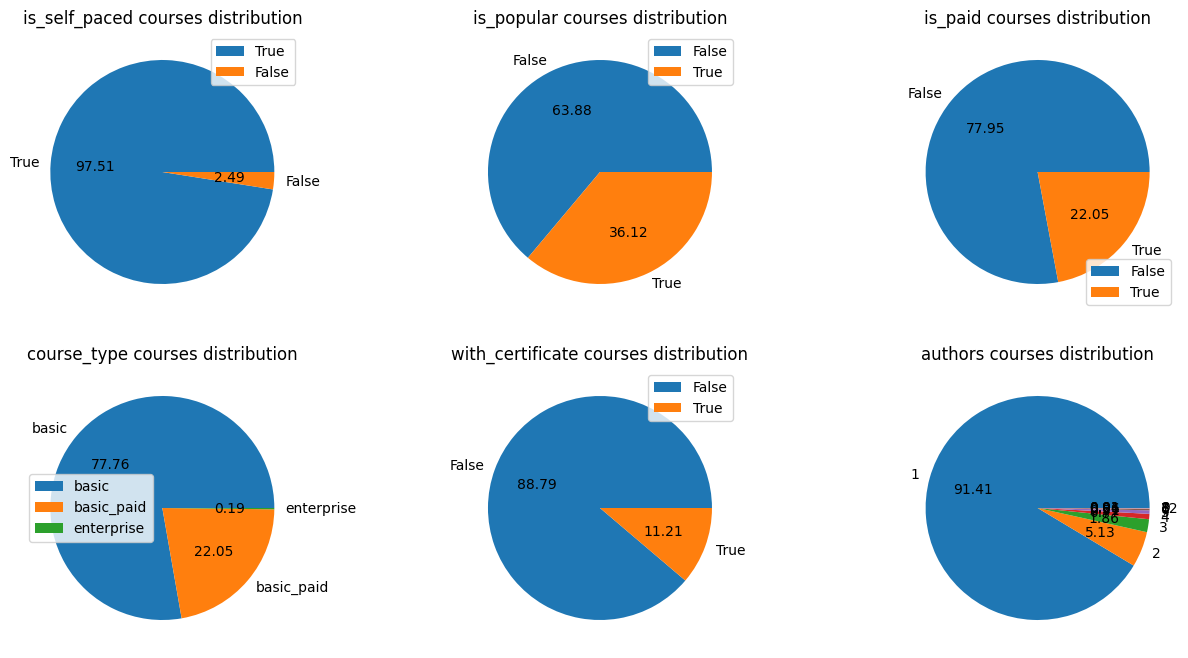

In [43]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 3, 1)
draw_pie_chart('is_self_paced')
plt.subplot(2, 3, 2)
draw_pie_chart('is_popular')
plt.subplot(2, 3, 3)
draw_pie_chart('is_paid')
plt.subplot(2, 3, 4)
draw_pie_chart('course_type')
plt.subplot(2, 3, 5)
draw_pie_chart('with_certificate')
plt.subplot(2, 3, 6)
draw_pie_chart('authors', draw_legend=False)

#plt.tight_layout()

    Почти все представленные крусы можно проходить в своем темпе. Можно увидеть распределение популярности курсов, больше половины не являются
    популярными (как замеряется популярность в stepik неизвестно). Также, почти 3/4 всех курсов являются бесплатными, это обязательно нужно
    учитывать, при анализе ценовых параметров курсов. Еще почти 90% курсов не имеют серитификата об окончании.

Посмотрим на целевой бизнес-признак - цену

In [44]:
df_paid = df[df['is_paid'] == True][['tags', 'display_price']]
df_paid.head()

,tags,display_price
1,"[1, 2, 5, 52]",3900
9,"[182, 231, 233, 248, 249, 250, 261, 263]",250
10,"[1, 82, 89, 157, 393]",29900
18,"[1, 2, 6, 15, 42, 43, 44, 54]",1450
20,"[182, 233, 248, 249, 283, 314, 321]",245


In [45]:
expanded_data = []
for _, row in df_paid.iterrows():
    for tag in row["tags"]:
        new_row = row.to_dict()
        new_row["tag"] = tag
        del new_row["tags"]
        expanded_data.append(new_row)


df_expanded = pd.DataFrame(expanded_data)

df_expanded[['tag', 'display_price']].head(10)

,tag,display_price
0,1,3900
1,2,3900
2,5,3900
3,52,3900
4,182,250
5,231,250
6,233,250
7,248,250
8,249,250
9,250,250


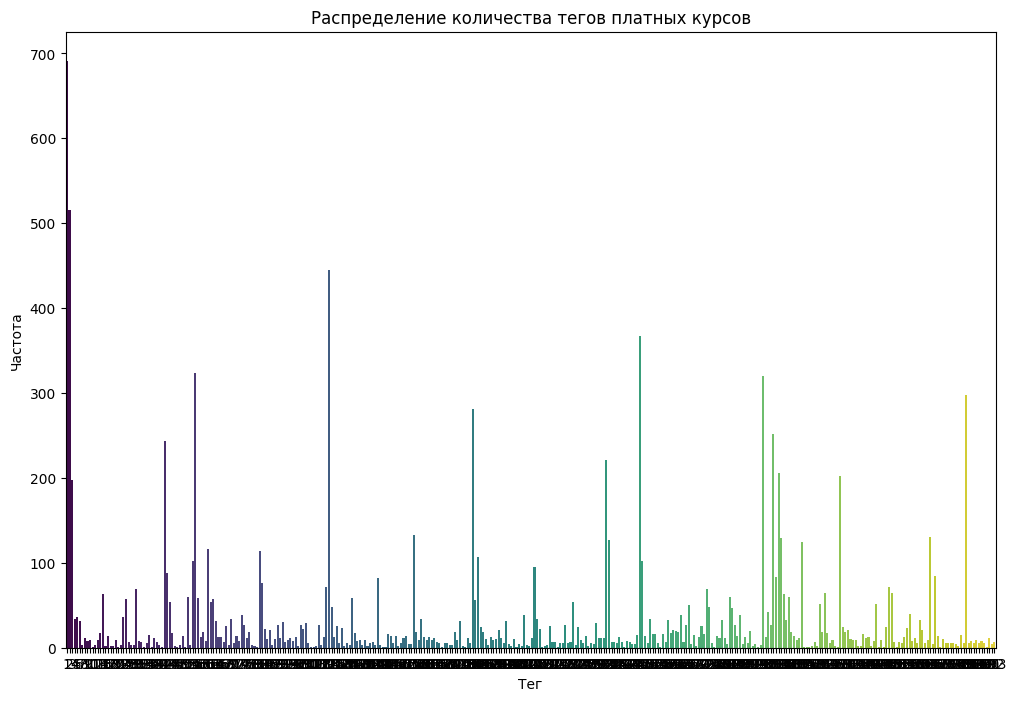

In [46]:
plt.figure(figsize=(12, 8))
sns.countplot(x=df_expanded["tag"], hue=df_expanded["tag"], palette="viridis", legend=False)
plt.title("Распределение количества тегов платных курсов")
plt.xlabel("Тег")
plt.ylabel("Частота")
plt.show()


    Из-за количества разных тегов на графике сложно определить точно какие группы встреачются чаще всего. Stepik - платформа для
    прохождения курсов с практической частью, обучение программированию - идеально подходит под такой формат. Гипотеза: чаще всего мы будем
    встречать крусы по программированию. Также, в силу особенности составления тегов, чаще всего будут встречатся теги верхних иерархий.

In [47]:
top_paid_tags = tag_counter(df[df['is_paid'] == True], top=10)
top_free_tags = tag_counter(df, top=10)

In [48]:
top_paid_tags_text = dict(map(lambda x: (idx2tags[x[0]], x[1]), top_paid_tags))
top_free_tags_text = dict(map(lambda x: (idx2tags[x[0]], x[1]), top_free_tags))

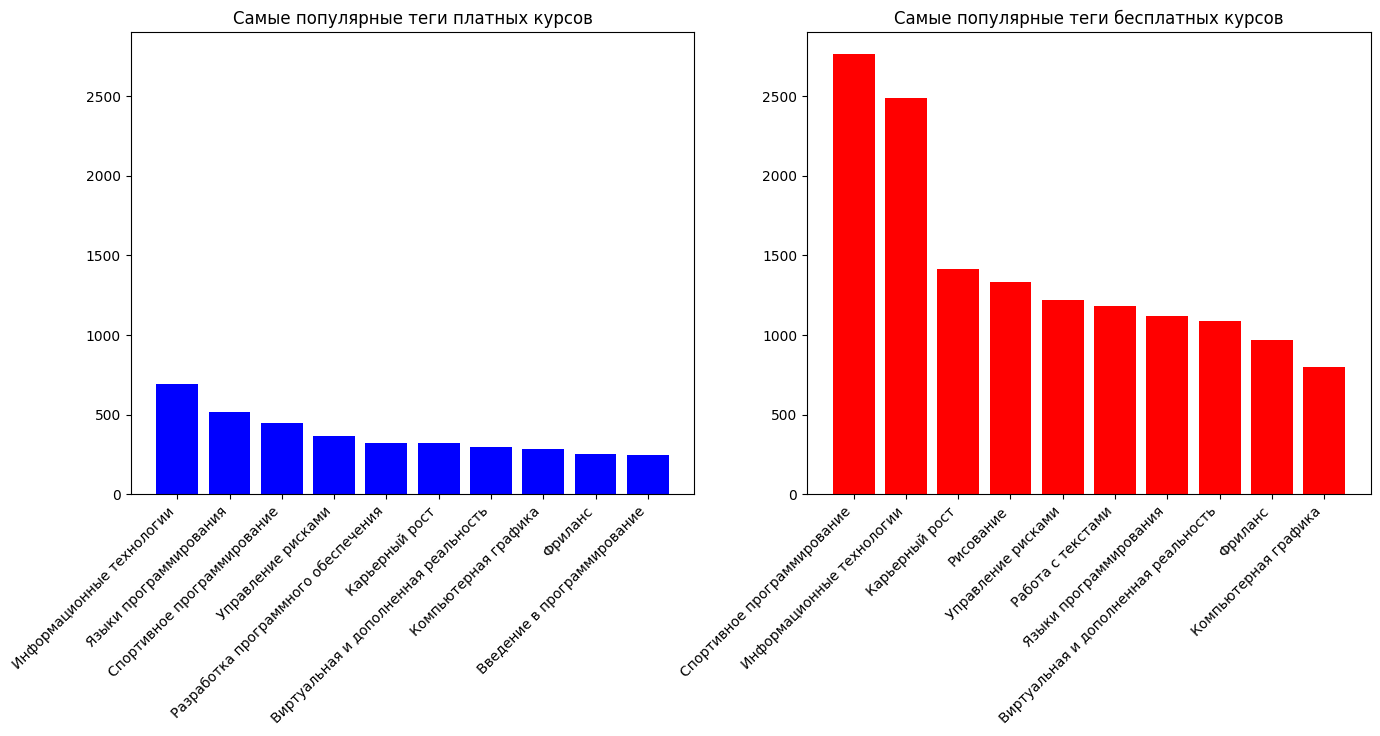

In [49]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.bar(top_paid_tags_text.keys(), top_paid_tags_text.values(), color='blue')
plt.title('Самые популярные теги платных курсов')
plt.xticks(rotation=45, ha='right')
plt.gca().set_ylim(0, 2900)

plt.subplot(1, 2, 2)
plt.bar(top_free_tags_text.keys(), top_free_tags_text.values(), color='red')
plt.title('Самые популярные теги бесплатных курсов')
plt.xticks(rotation=45, ha='right');

    Гипотеза оказалась верна - самые многочисленные курсы (при чем как платные, так и бесплатные) относятся к программированию. За ними идут
    курсы, смежные с рисками, финансами и развитием карьеры. Можно отметить, что бесплатные курсы по программированию идут
    с большим отрывом по упоминаниям.

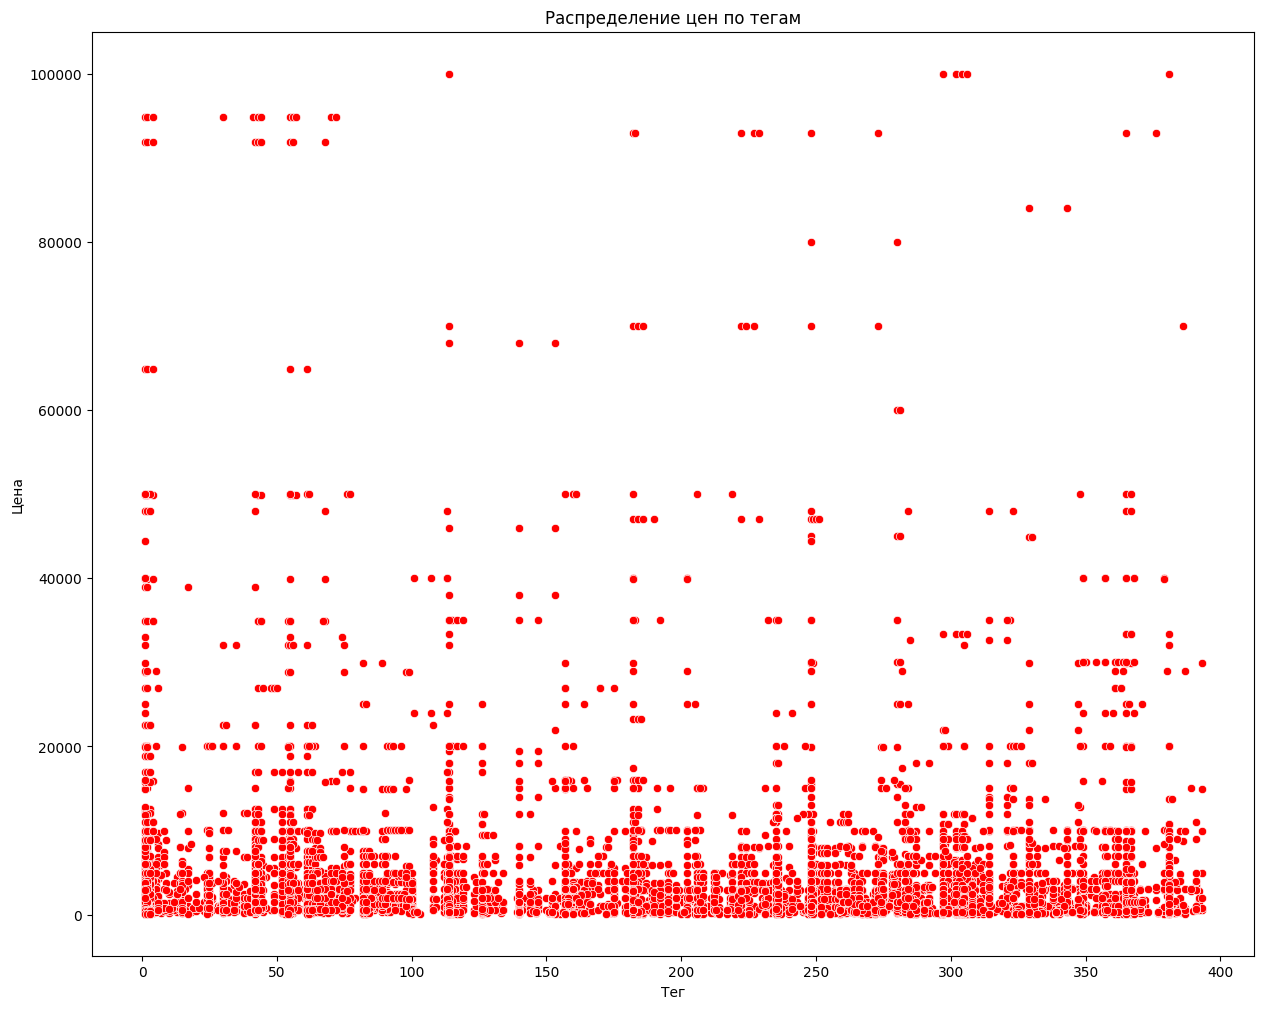

In [50]:
plt.figure(figsize=(15, 12))
sns.scatterplot(x=df_expanded["tag"], y=df_expanded["display_price"], color="red")
plt.title("Распределение цен по тегам")
plt.xlabel("Тег")
plt.ylabel("Цена")
plt.show()

In [51]:
df_price_sorted = df[df['is_paid'] == True][['title', 'display_price', 'tags_text']].sort_values(by='display_price', ascending=False)

In [52]:
pd.set_option('display.max_colwidth', None)
df_price_sorted.head(10)

,title,display_price,tags_text
4493,Самая эффективная подготовка к ЕГЭ по информатике с 0 до 80+,99999,"[Карьерный рост, Фриланс, Криптовалюта, Спортивное программирование, Йога, осознанность и медитация, Виртуальная и дополненная реальность]"
2400,"PRO C#. Профессия ""Разработчик игр на Unity""",94900,"[Информационные технологии, Языки программирования, C#, Фреймворки и библиотеки, LINQ, Парадигмы программирования, Объектно-ориентированное программирование, Разработка программного обеспечения, Разработка ПО для начинающих, Системы контроля версий, Разработка игр, Unity]"
1842,Введение в управление изменениями от Почётного Доктора Наук,92990,"[Компьютерная графика, Фотография, Отраслевые курсы, Недвижимость, Интернет-маркетинг, Управление рисками, Лидерство и управление, Механика, Архитектура]"
4445,"PRO C#. Профессия ""Разработчик Telegram ботов""",91900,"[Информационные технологии, Языки программирования, C#, Введение в программирование, Парадигмы программирования, Объектно-ориентированное программирование, Разработка программного обеспечения, Разработка ПО для начинающих, Чат-боты]"
6550,Косметик-эстетист,84000,"[Здоровье и безопасность, Привлечение средств]"
4538,Pro_trading ПОЛНЫЙ КУРС,80000,"[Управление рисками, Переговоры]"
2470,Разработка продуктового плана от Почётного Доктора Наук,69990,"[Спортивное программирование, Компьютерная графика, Производство и монтаж видео, Анимация и моушен-дизайн, Отраслевые курсы, Сельское хозяйство, Недвижимость, Управление рисками, Лидерство и управление, Блокчейн]"
3803,Юрист для онлайн-бизнеса. Базовый курс,68000,"[Спортивное программирование, Теория игр, Антропология]"
2325,PRO C#. ASP.NET Core. Потоковый с бонусами,64900,"[Информационные технологии, Языки программирования, C#, Разработка программного обеспечения, Веб-разработка]"
6206,Крипто-машина,59990,"[Переговоры, Невербальная коммуникация]"


    Можно заметить, что здесь присутствуют странные курсы, по типу Косметик-эстетист за какие-то космические деньги 84 000 рублей,
    подготовка к ЕГЭ за 100 000 рублей, крипто-машина.
    Смотреть на самые дорогие курсы - не самый лучший подход для бизнеса, ведь создатель курса поулчает процент за покупку.
    Давайте лучше посмотрим на суммарную выручку курса: умножим количество учеников на стоимость курса.

In [53]:
df_revenue = df[df['is_paid'] == True][['title', 'display_price', 'learners_count', 'tags_text']]
df_revenue['revenue'] = df_revenue['display_price'] * df_revenue['learners_count']
df_revenue = df_revenue.sort_values(by='revenue', ascending=False)

In [54]:
df_revenue[['title', 'tags_text', 'revenue', 'display_price']].head(10)

,title,tags_text,revenue,display_price
7359,Функциональное программирование на Python,"[Информационные технологии, Языки программирования, Python, Введение в программирование, Парадигмы программирования, Функциональное программирование]",21759484.0,1499
8155,"Международная выставка-форуме ""Россия""на ВДНХ.","[Компьютерная графика, Бизнес и менеджмент, Управление транспортными средствами, Выпускные экзамены в школе, Градостроительство]",12533580.0,3890
9804,"Добрый, добрый Django с Сергеем Балакиревым","[Информационные технологии, Фреймворки и библиотеки, Django, Языки программирования, Python]",7717500.0,2500
2470,Разработка продуктового плана от Почётного Доктора Наук,"[Спортивное программирование, Компьютерная графика, Производство и монтаж видео, Анимация и моушен-дизайн, Отраслевые курсы, Сельское хозяйство, Недвижимость, Управление рисками, Лидерство и управление, Блокчейн]",7278960.0,69990
8439,Многопоточный Python,"[Информационные технологии, Языки программирования, Python, Введение в программирование, Парадигмы программирования, Параллельные вычисления, Алгоритмы и структуры данных, Разработка программного обеспечения, Веб-разработка, Бэкенд-разработка]",6720000.0,5000
4975,Kotlin с нуля до Junior + Подготовка к собеседованию,"[Языки программирования, Kotlin, Введение в программирование, Разработка программного обеспечения, Разработка мобильных приложений, Android, Управление рисками, Работа в команде, Навыки общения, Информационные технологии, Разрешение конфликтов]",6688570.0,7490
7516,PRO C#. Коллекции,"[Информационные технологии, Языки программирования, C#, Введение в программирование, Алгоритмы и структуры данных]",6457000.0,11000
1842,Введение в управление изменениями от Почётного Доктора Наук,"[Компьютерная графика, Фотография, Отраслевые курсы, Недвижимость, Интернет-маркетинг, Управление рисками, Лидерство и управление, Механика, Архитектура]",6137340.0,92990
9283,1С программирование для начинающих,"[Информационные технологии, Языки программирования, 1C, Введение в программирование]",5885250.0,3990
6265,CCNP Enterprise ENCOR 350-401 перевод на русский,"[Информационные технологии, Операционные системы]",5024000.0,16000


    Другое дело, теперь появились совсем другие курсы, при чем дешевые. Но некоторые остались, например,
    какие-то курсы от Почетного Доктора Наук за огромные деньги

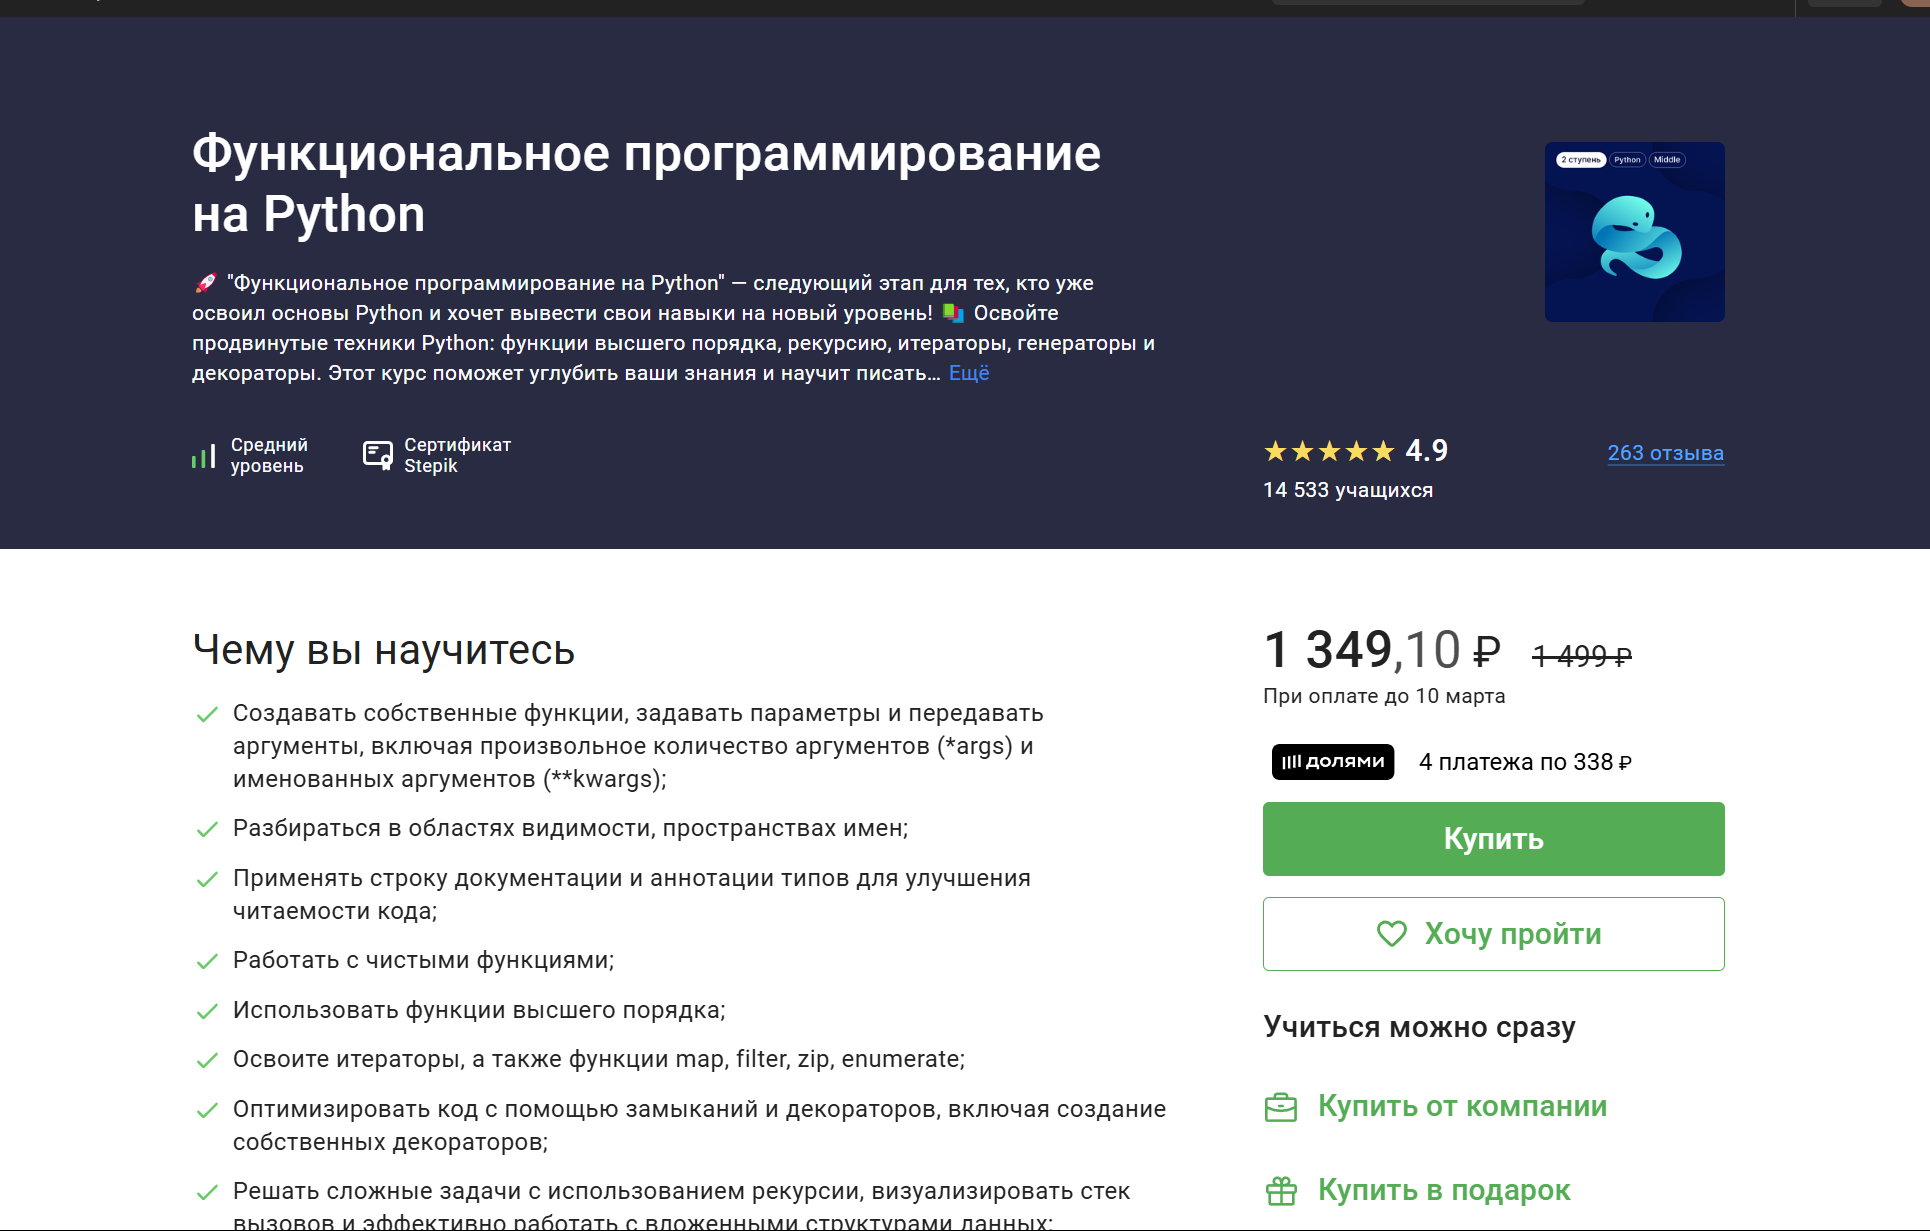

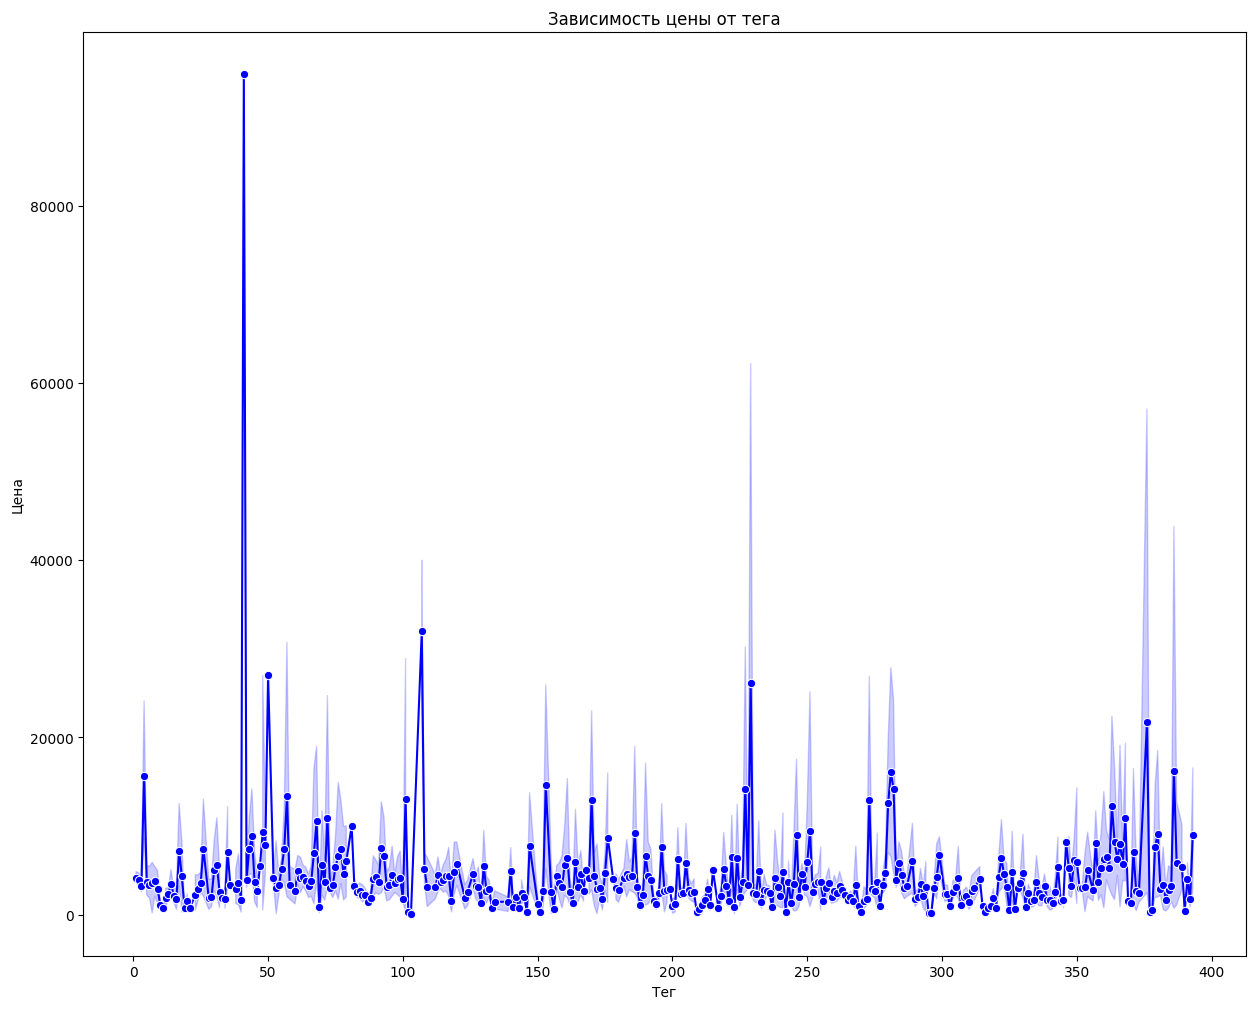

In [55]:
plt.figure(figsize=(15, 12))
sns.lineplot(x=df_expanded["tag"], y=df_expanded["display_price"], marker="o", linestyle="-", color="blue")
plt.title("Зависимость цены от тега")
plt.xlabel("Тег")
plt.ylabel("Цена")
plt.show()

In [56]:
tag_statistics = df_expanded[(3 <= df_expanded['tag']) & (df_expanded['tag'] <= 28)]
tag_statistics = tag_statistics.groupby(['tag'])['display_price'].agg(['min', 'mean', 'max']).reset_index().sort_values('mean', ascending=False)
tag_statistics.loc[:, 'tags_text'] = tag_statistics['tag'].apply(lambda x: idx2tags[x])
tag_statistics[['tags_text', 'min', 'mean', 'max']].head(10)

,tags_text,min,mean,max
1,C#,149,15691.411765,94900
22,TypeScript,599,7423.857143,20000
14,1C,100,7175.714286,38900
15,Pascal,290,4312.000000,8334
5,Kotlin,390,3759.916667,9990
2,C/C++,300,3669.111111,29000
4,Scala,190,3586.333333,5890
21,JavaScript,149,3539.807018,20000
11,Go,490,3506.588235,11990
3,Java,390,3338.290323,27000


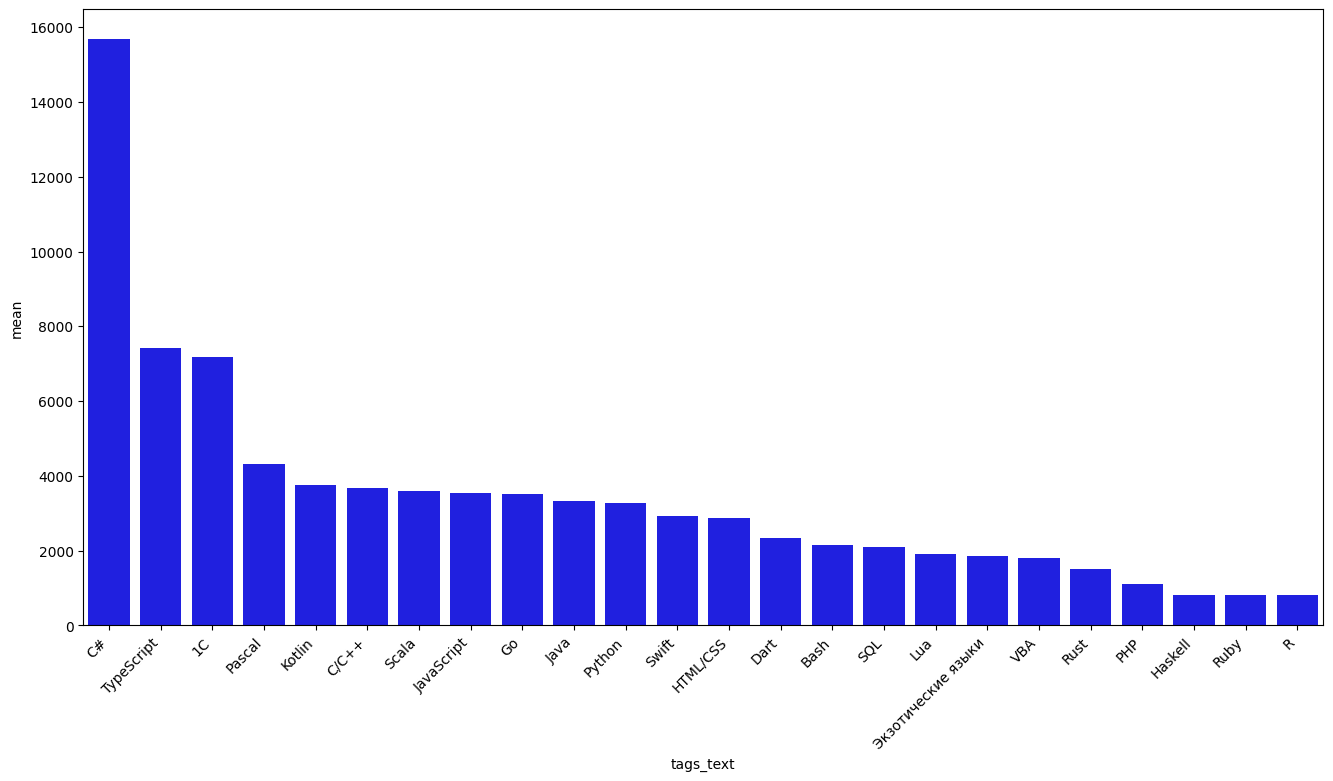

In [57]:
plt.figure(figsize=(16, 8))
sns.barplot(tag_statistics, x='tags_text', y='mean', color='blue')
plt.xticks(rotation=45, ha='right');

In [58]:
df[['title', 'learners_count', 'tags_text']].sort_values('learners_count', ascending=False).head(10)

,title,learners_count,tags_text
7719,"Добрый, добрый C/C++ с Сергеем Балакиревым",29760.0,"[Информационные технологии, Языки программирования, C/C++]"
8141,Введение в SQL,22509.0,"[Информационные технологии, Языки программирования, SQL, Введение в программирование, Базы данных, Бизнес-анализ, Аналитика и исследование данных]"
8759,Тестирование ПО с нуля. Тесты,16891.0,"[Информационные технологии, Разработка программного обеспечения, Тестирование ПО, Черепашья графика, Управление рисками, Работа в команде, Навыки общения]"
6580,Трудовой зачёт,16813.0,"[Управление рисками, Работа в команде, Технологии и инновации]"
7359,Функциональное программирование на Python,14516.0,"[Информационные технологии, Языки программирования, Python, Введение в программирование, Парадигмы программирования, Функциональное программирование]"
8946,Разработка веб-сервисов на Golang (Go),13634.0,"[Информационные технологии, Языки программирования, Go, Разработка программного обеспечения, Веб-разработка, Бэкенд-разработка]"
4637,"Добрый, добрый ИИ. Часть 1. Машинное обучение",13127.0,"[Информационные технологии, Бизнес-анализ, Механика, Материаловедение, BI-аналитика, Глубинное обучение, Нейронные сети]"
4971,Python для ЕГЭ по Информатике,11659.0,"[Языки программирования, Python, Карьерный рост, Фриланс, Криптовалюта, Спортивное программирование, Йога, осознанность и медитация, Виртуальная и дополненная реальность]"
7372,100 уроков математики от Алексея Савватеева!,11423.0,"[Спортивное программирование, Науки о Земле и экология, Управление недвижимостью, Виртуальная и дополненная реальность]"
9979,Java Тренажер,11332.0,"[Информационные технологии, Языки программирования, Java, Разработка программного обеспечения, Веб-разработка, Бэкенд-разработка, Тестирование ПО, Разработка мобильных приложений, Android]"


<ipython-input-59-f3b51c882e95>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_expanded1['tag'], y=df_expanded1["display_price"], palette="deep")


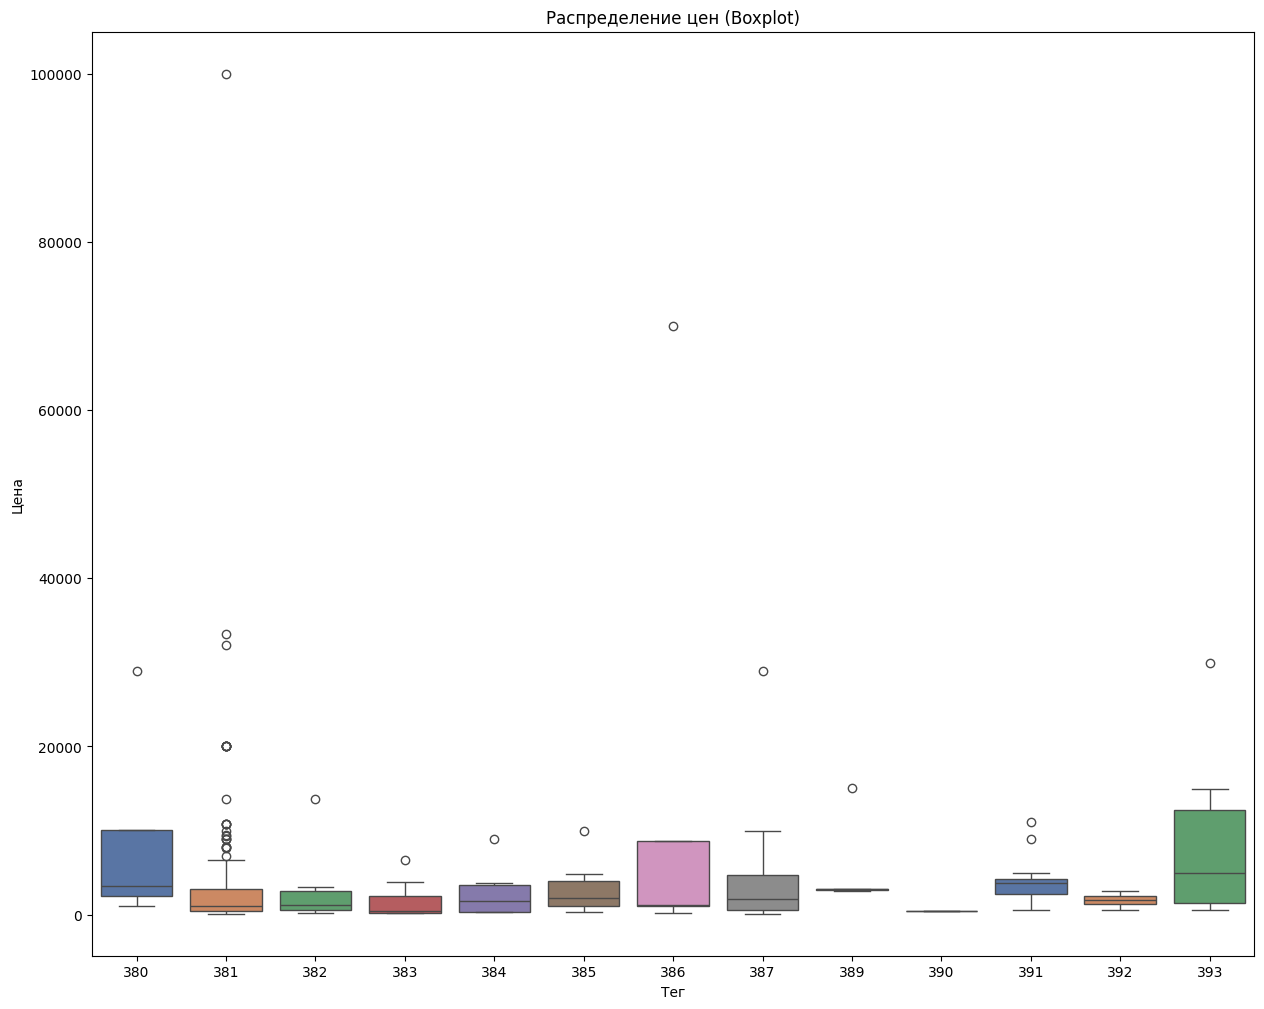

In [59]:
df_expanded1 = df_expanded[df_expanded['tag'] >= 380]
plt.figure(figsize=(15, 12))
sns.boxplot(x=df_expanded1['tag'], y=df_expanded1["display_price"], palette="deep")
plt.title("Распределение цен (Boxplot)")
plt.xlabel("Тег")
plt.ylabel("Цена")
plt.show()

In [60]:
ranges = {
    "Информационные технологии": range(1, 116),
    "Учебные и академические дисциплины": range(116, 176),
    "Дизайн и медиа": range(176, 202),
    "Бизнес и менеджмент": range(202, 257),
    "Языки": range(257, 271),
    "Личностный рост": range(271, 311),
    "Обучение преподавателей": range(311, 321),
    "Подготовка к экзаменам": range(321, 329),
    "Здоровье и безопасность": range(329, 339),
    "Общественная деятельность": range(339, 344),
    "Досуг": range(344, 363),
    "Детям и подросткам": range(363, 364),
    "Инженерное дело": range(364, 376),
    "Архитектура": range(376, 380),
    "Технологии и инновации": range(380, 392),
}


def assign_category(tag):
    for category, tag_range in ranges.items():
        if tag in tag_range:
            return category
    return "Неизвестная категория"

df_expanded["category"] = df_expanded["tag"].apply(assign_category)

df_expanded.head()

,display_price,tag,category
0,3900,1,Информационные технологии
1,3900,2,Информационные технологии
2,3900,5,Информационные технологии
3,3900,52,Информационные технологии
4,250,182,Дизайн и медиа


In [65]:
df.head(1)

,id,title,summary,workload,target_audience,requirements,description,sections,total_units,is_self_paced,authors,certificates_count,learners_count,lessons_count,quizzes_count,challenges_count,videos_duration,is_popular,is_paid,display_price,readiness,course_type,with_certificate,language,create_date,update_date,tags,tags_text
0,233488,Тайны китайских иероглифов: от рисунков к символам,"Данный курс является учебным заданием в рамках университетской дисциплины и не представляет собой полноценный образовательный курс. Его цель – продемонстрировать основы проектирования электронных учебных материалов.\nЭтот курс представляет собой краткое введение в китайскую письменность. В нём рассматриваются структура иероглифов, их основные элементы, а также историческое развитие системы письма.\n",NaN,NaN,NaN,NaN,3,6.0,True,1,0.0,0.0,6.0,6.0,0.0,0.0,False,False,0,0.7,basic,False,ru,2025-02-25 04:58:57+00:00,2025-02-25 08:37:02+00:00,"[235, 241]","[Работа с текстами, Продвижение на маркетплейсах]"


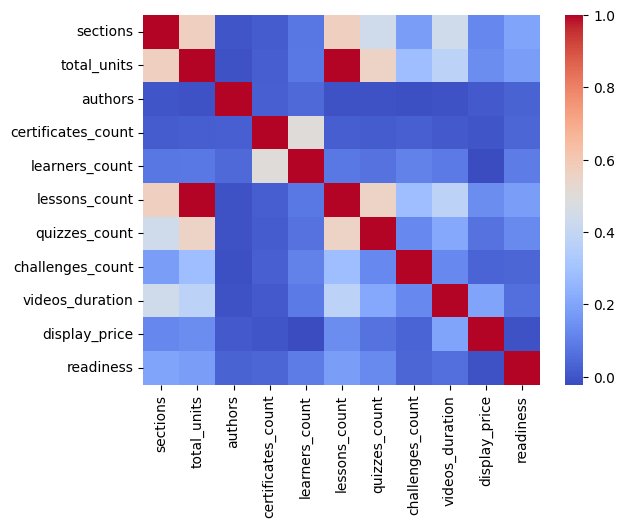

In [66]:
sns.heatmap(df[
    [
        'sections', 'total_units',
        'authors', 'certificates_count',
        'learners_count', 'lessons_count',
        'quizzes_count',	'challenges_count',
        'videos_duration', 'display_price',	'readiness']
    ].corr(), cmap='coolwarm'
);